# Libraries

In [1]:
# !pip install torchbench --user
# !pip install transformers
# !pip install evaluate
# !pip install torch
# !pip install opencv-python

In [3]:
# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image

# Basic libraries
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For importing models and working with them
## Torch
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
# from sklearn.model_selection import train_test_split

import pathlib
import cv2

# For XML files
from bs4 import BeautifulSoup

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Pre Processing

## Split

In [3]:
path = "C:\\Users\\bianc\\OneDrive - Universitatea Politehnica Bucuresti\\Documents\\Facultate\\Master Proiect\\Datasets\\COCO\\"
person_path = path + "Person\\"

val_path = path + "val2017\\val2017\\"

ann_path = path + "panoptic_annotations_trainval2017\\annotations\\"
ann_train_path = ann_path + "panoptic_train2017\\panoptic_train2017\\"
ann_val_path = ann_path + "panoptic_val2017\\panoptic_val2017\\"


In [45]:
os.makedirs((path + 'Person'), exist_ok = True)
os.makedirs((path + 'Person' + '\\Images'), exist_ok = True)
os.makedirs((path + 'Person' + '\\Annotations'), exist_ok = True)
os.makedirs((path + 'Person' + '\\Images_Train'), exist_ok = True)
os.makedirs((path + 'Person' + '\\Images_Test'), exist_ok = True)
os.makedirs((path + 'Person' + '\\Annotations_Train'), exist_ok = True)
os.makedirs((path + 'Person' + '\\Annotations_Test'), exist_ok = True)

## removing the classes to start again
# shutil.rmtree((path + 'Person'))
# shutil.rmtree((path + 'Person' + '\\Images'))
# shutil.rmtree((path + 'Person' + '\\Annotations'))
# shutil.rmtree((path + 'Person' + '\\Images_Train'))
# shutil.rmtree((path + 'Person' + '\\Images_Test'))
# shutil.rmtree((path + 'Person' + '\\Annotations_Train'))
# shutil.rmtree((path + 'Person' + '\\Annotations_Test'))

In [6]:
import json

json_val_path = ann_path + "panoptic_val2017.json"

with open(json_val_path) as f:
    superHeroSquad = json.load(f)
type(superHeroSquad)

superHeroSquad.keys()
# Output: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

data = superHeroSquad
# data


{'info': {'description': 'COCO 2018 Panoptic Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2018,
  'contributor': 'https://arxiv.org/abs/1801.00868',
  'date_created': '2018-06-01 00:00:00.0'},
 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
   'id': 2,
   'name': 'Attribution-NonCommercial License'},
  {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
   'id': 3,
   'name': 'Attribution-NonCommercial-NoDerivs License'},
  {'url': 'http://creativecommons.org/licenses/by/2.0/',
   'id': 4,
   'name': 'Attribution License'},
  {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
   'id': 5,
   'name': 'Attribution-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
   'id': 6,
   'name': 'Attribution-NoDerivs License'},
  {'url': 'http://flickr.com/commons/u

In [10]:
print(len(data['images']))
data['images'][0]

5000


{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [23]:
print(len(data['annotations']))
data['annotations'][0]
# output => segments_info, file_name, image_id

5000


{'segments_info': [{'id': 3226956,
   'category_id': 1,
   'iscrowd': 0,
   'bbox': [413, 158, 53, 138],
   'area': 2840},
  {'id': 6979964,
   'category_id': 1,
   'iscrowd': 0,
   'bbox': [384, 172, 16, 36],
   'area': 439},
  {'id': 3103374,
   'category_id': 62,
   'iscrowd': 0,
   'bbox': [413, 223, 30, 81],
   'area': 1250},
  {'id': 2831194,
   'category_id': 62,
   'iscrowd': 0,
   'bbox': [291, 218, 62, 98],
   'area': 1848},
  {'id': 3496593,
   'category_id': 62,
   'iscrowd': 0,
   'bbox': [412, 219, 10, 13],
   'area': 90},
  {'id': 2633066,
   'category_id': 62,
   'iscrowd': 0,
   'bbox': [317, 219, 22, 12],
   'area': 212},
  {'id': 3165572,
   'category_id': 62,
   'iscrowd': 0,
   'bbox': [359, 218, 56, 103],
   'area': 2251},
  {'id': 8824489,
   'category_id': 64,
   'iscrowd': 0,
   'bbox': [237, 149, 24, 62],
   'area': 369},
  {'id': 3032951,
   'category_id': 67,
   'iscrowd': 0,
   'bbox': [321, 231, 126, 89],
   'area': 2134},
  {'id': 2038814,
   'category_id

In [34]:
print(len(data['annotations'][0]["segments_info"]))
data['annotations'][0]["segments_info"][0]

30


{'id': 3226956,
 'category_id': 1,
 'iscrowd': 0,
 'bbox': [413, 158, 53, 138],
 'area': 2840}

In [26]:
for i in data['categories']:
    print(i)

print(len(data['categories']))
# data['categories'][0]

{'supercategory': 'person', 'isthing': 1, 'id': 1, 'name': 'person'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 2, 'name': 'bicycle'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 3, 'name': 'car'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 4, 'name': 'motorcycle'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 5, 'name': 'airplane'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 6, 'name': 'bus'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 7, 'name': 'train'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 8, 'name': 'truck'}
{'supercategory': 'vehicle', 'isthing': 1, 'id': 9, 'name': 'boat'}
{'supercategory': 'outdoor', 'isthing': 1, 'id': 10, 'name': 'traffic light'}
{'supercategory': 'outdoor', 'isthing': 1, 'id': 11, 'name': 'fire hydrant'}
{'supercategory': 'outdoor', 'isthing': 1, 'id': 13, 'name': 'stop sign'}
{'supercategory': 'outdoor', 'isthing': 1, 'id': 14, 'name': 'parking meter'}
{'supercategory': 'outdoor', 'isthing': 1, 'id': 15, 'name': 'bench

{'supercategory': 'person', 'isthing': 1, 'id': 1, 'name': 'person'}

In [35]:
img_names = []

for img in range(0, len(data['images'])):

    pers = False

    for index in range(0, len(data['annotations'][img]["segments_info"])):
        if data['annotations'][img]["segments_info"][index]["category_id"] == 1:
            pers = True
            break

    if pers == True:
        img_names.append(data['annotations'][img]["file_name"])

print(len(img_names))
# img_names

2693


['000000000139.png',
 '000000000785.png',
 '000000000872.png',
 '000000000885.png',
 '000000001000.png',
 '000000001268.png',
 '000000001296.png',
 '000000001353.png',
 '000000001490.png',
 '000000001584.png',
 '000000001761.png',
 '000000002006.png',
 '000000002153.png',
 '000000002261.png',
 '000000002299.png',
 '000000002431.png',
 '000000002473.png',
 '000000002532.png',
 '000000002685.png',
 '000000003156.png',
 '000000003255.png',
 '000000003553.png',
 '000000003934.png',
 '000000004134.png',
 '000000004395.png',
 '000000004765.png',
 '000000005001.png',
 '000000005037.png',
 '000000005060.png',
 '000000005193.png',
 '000000005529.png',
 '000000005586.png',
 '000000006040.png',
 '000000006460.png',
 '000000006471.png',
 '000000006763.png',
 '000000006771.png',
 '000000006894.png',
 '000000006954.png',
 '000000007088.png',
 '000000007278.png',
 '000000007281.png',
 '000000007511.png',
 '000000007816.png',
 '000000007977.png',
 '000000008021.png',
 '000000008211.png',
 '00000000853

In [39]:
for img in img_names:

    # for original images
    source_img = val_path + img[:12] + '.jpg'
    destination_img = path + 'Person\\' + 'Images\\' + img[:12] + '.jpg'

    # for annotations images
    source_ann = ann_val_path + img
    destination_ann = path + 'Person\\' + 'Annotations\\' + img

    shutil.copy(source_img, destination_img)
    shutil.copy(source_ann, destination_ann)

## Train - Test

In [48]:
len_pers_img = len(img_names)
train_test_split = 0.7

# For Images
count = 1

for image in os.listdir((path + 'Person' + '\\Images')):
    src = path + 'Person' + '\\Images\\' + image

    if count <= (train_test_split * len_pers_img):
        dest = path + 'Person' + '\\Images_Train\\' + image
    else:
        dest = path + 'Person' + '\\Images_Test\\' + image

    shutil.copy(src, dest)
    count = count + 1


# For Annotations
count = 1

for image in os.listdir((path + 'Person' + '\\Annotations')):
    src = path + 'Person' + '\\Annotations\\' + image

    if count <= (train_test_split * len_pers_img):
        dest = path + 'Person' + '\\Annotations_Train\\' + image
    else:
        dest = path + 'Person' + '\\Annotations_Test\\' + image

    shutil.copy(src, dest)
    count = count + 1

## Arrays

In [4]:
train_img = []
test_img = []

train_ann = []
test_ann = []

for image in os.listdir((path + 'Person' + '\\Images_Train')):
    train_img.append(image)

for image in os.listdir((path + 'Person' + '\\Images_Test')):
    test_img.append(image)

for image in os.listdir((path + 'Person' + '\\Annotations_Train')):
    train_ann.append(image)

for image in os.listdir((path + 'Person' + '\\Annotations_Test')):
    test_ann.append(image)

In [5]:
print(len(train_ann))
len(test_img)


1885


808

## Visualize

In [6]:
index = 1500
img = Image.open(person_path + 'Images_Train\\' + train_img[index])
mask = Image.open(person_path + 'Annotations_Train\\' + train_ann[index])

print('Image Size', np.asarray(img).shape)
print('Mask Size', np.asarray(mask).shape)

# plt.figure(figsize=(12, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(img)
# plt.title('Original Image')
#
# plt.subplot(1, 3, 2)
# plt.imshow(mask)
# plt.title('Mask')
#
# plt.subplot(1, 3, 3)
# plt.imshow(img)
# plt.imshow(mask, alpha = 0.7)
# plt.title('Picture with Mask')
#
# plt.show()

Image Size (480, 640, 3)
Mask Size (480, 640, 3)


In [15]:
mask_arr = np.array(mask)
mask_arr[240, 300, 0]

114

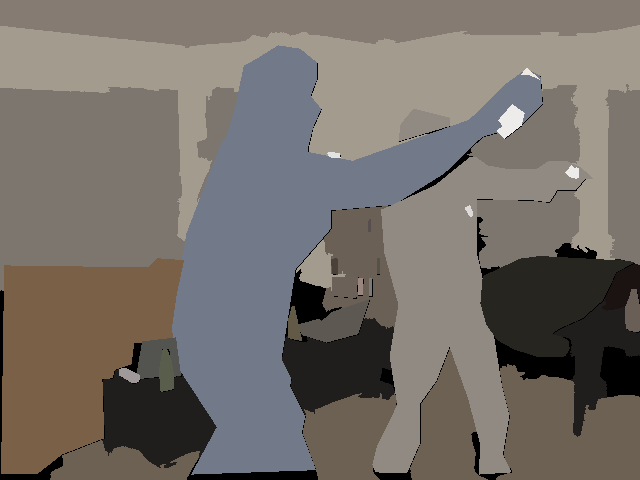

In [14]:
mask

# Model

In [18]:
## Transformers used for resizing the images

transformer = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),           # change the pixel range from 0-255 to 0-1 => data type from numpy to tensors
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [32]:
from torch.utils import data

class simpleDataset(data.Dataset):

    # initialise function of class
    def __init__(self, root, filenames, labels):
        # the data directory
        self.root = root
        # the list of filename
        self.filenames = filenames
        # the list of label
        self.labels = labels

    # obtain the sample with the given index
    def __getitem__(self, index):
        # obtain filenames from list
        image_filename = self.filenames[index]
        # Load data and label
        image = Image.open(os.path.join(self.root, image_filename))
        label = self.labels[index]

        # output of Dataset must be tensor
        image = transforms.ToTensor()(image)
        label = torch.as_tensor(label, dtype=torch.int64)
        return image, label

    # the total number of samples (optional)
    def __len__(self):
        return len(self.filenames)

In [38]:
## Loading Data

# Dataloader - for feeding the data to the model in batches
batch_size = 16



## For Train set
train_path = person_path + 'Images_Train\\'

train_ds = simpleDataset(root = train_path,
                         filenames = train_img,
                         labels = [1]
                         )

train_loader = DataLoader(train_ds, #torchvision.datasets.ImageFolder(train_path, transform = transformer),
                          batch_size = batch_size,
                          shuffle = True
                          )
## For Test set
test_path = person_path + 'Images_Test\\'

test_ds = simpleDataset(root = test_path,
                        filenames = test_img,
                        labels = [1]
                       )

test_loader = DataLoader(test_ds, #torchvision.datasets.ImageFolder(test_path, transform = transformer),
                         batch_size = batch_size,
                         shuffle = True
                         )

TypeError: __init__() got an unexpected keyword argument 'transform'

In [37]:
train_loader

In [91]:
weights = torchvision.models.segmentation.DeepLabV3_MobileNet_V3_Large_Weights
model = torchvision.models.segmentation.deeplabv3_mobilenet_v3_large(pretrained = True, weights = weights) # deeplabv3 with mobilenetv3-large backbone
model.eval().to(device)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride

In [ ]:
# correct = 0
# total = 0

# for images, labels in train_loader:

#     images = images.to(device)
#     outputs = model(images)

#     _, predicted = torch.max(outputs.data, 1)

#     total += labels.size(0)
#     correct += (predicted == labels.to(device)).sum()

# print('Accuracy of test images: %f %%' % (100 * float(correct) / total))